In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dir_path = "/content/drive/My Drive/Quarters/Winter 2024/EduCV/FairFace-master"


In [4]:
!ls "{dir_path}"

 detected_faces		        predict_bbox.py   test			 test_tv_annotations.csv
 dlib_models		        predict.py	 'Test FairFace.ipynb'	 test_tv_images
 examples		        ReadMe		  test_imgs.csv		 test_tv_imgs.csv
 friends_test_scene_short.mp4   README.md	  test_outputs.csv	 test_tv_imgs.gsheet


In [5]:
# Create image CSV

import os
import csv

# Directory name
directory_name = 'test_tv_images'

# List to store image paths
image_paths = []

# Loop through every file in the specified directory
for file in os.listdir(dir_path + "/" + directory_name):
    # Construct the file path
    file_path = os.path.join(dir_path + "/" + directory_name, file)
    # Check if it's a file and not a directory
    if os.path.isfile(file_path):
        # Add the file path to the list
        new_path = file_path.split("master/")[1]
        print(new_path)
        # if new_path == "test_tv_images/truelove1.png":
        image_paths.append(new_path)

# Specify the CSV file name
csv_file_name = 'test_tv_imgs.csv'

# Create and write to the CSV file
with open(csv_file_name, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(['img_path'])
    # Write the image paths
    for path in image_paths:
        writer.writerow([path])

# Note: Ensure the 'test' directory exists with the files you want to list.


test_tv_images/friends17.png
test_tv_images/friends18.png
test_tv_images/friends19.png
test_tv_images/friends9.png
test_tv_images/friends11.jpeg
test_tv_images/friends12.jpeg
test_tv_images/friends13.png
test_tv_images/friends14.png
test_tv_images/friends15.jpeg
test_tv_images/mr_mrs_smith1.png
test_tv_images/truelove1.png
test_tv_images/jane1.png
test_tv_images/beef2.png
test_tv_images/insecure1.png
test_tv_images/never2.png
test_tv_images/office1.jpeg
test_tv_images/greys1.png
test_tv_images/modern1.jpeg
test_tv_images/scream1.jpeg
test_tv_images/fresh1.png
test_tv_images/mandalorian1.jpeg
test_tv_images/bigbang1.jpeg
test_tv_images/got1.png
test_tv_images/er1.png
test_tv_images/narcos1.png
test_tv_images/nightof.png
test_tv_images/hawaii1.jpeg
test_tv_images/friends3.png
test_tv_images/superstore1.jpeg
test_tv_images/fresh2.jpeg
test_tv_images/quantico1.jpeg
test_tv_images/friends2.png
test_tv_images/friends1.png
test_tv_images/nikita1.png
test_tv_images/law1.png
test_tv_images/park

In [ ]:
# !python3 "{dir_path}/predict.py" --csv "{dir_path}/test_imgs.csv"


using CUDA?: True
---0/5---
detected faces are saved at  detected_faces
Predicting... 0/5
saved results at  test_outputs.csv


# Sample TV Data

In [ ]:
!python3 "{dir_path}/predict.py" --csv "test_tv_imgs.csv"


using CUDA?: True
0: test_tv_images/hawaii1.jpeg
---0/50---
1: test_tv_images/friends2.png
2: test_tv_images/superstore1.jpeg
3: test_tv_images/never1.jpeg
4: test_tv_images/mandalorian1.jpeg
5: test_tv_images/beef1.jpeg
6: test_tv_images/friends11.jpeg
7: test_tv_images/parks1.jpeg
8: test_tv_images/bigbang1.jpeg
9: test_tv_images/got1.png
10: test_tv_images/betty1.png
11: test_tv_images/friends13.png
12: test_tv_images/friends8.jpeg
13: test_tv_images/friends20.png
14: test_tv_images/friends7.png
15: test_tv_images/office1.jpeg
16: test_tv_images/lost1.jpeg
17: test_tv_images/friends15.jpeg
18: test_tv_images/truelove1.png
19: test_tv_images/beef2.png
20: test_tv_images/friends10.jpeg
21: test_tv_images/friends12.jpeg
22: test_tv_images/insecure1.png
23: test_tv_images/scream1.jpeg
24: test_tv_images/fresh1.png
25: test_tv_images/mr_mrs_smith1.png
26: test_tv_images/narcos1.png
27: test_tv_images/friends9.png
28: test_tv_images/modern1.jpeg
29: test_tv_images/friends19.png
30: test_t

# Evaluate Against Annotations

In [6]:
prediction_df = pd.read_csv(dir_path + "/test_tv_outputs.csv")[['face_name_align', 'race', 'race4', 'gender']]
ground_truth_df = pd.read_csv(dir_path + "/test_tv_annotations.csv")

In [7]:
ground_truth_df

,filename,race,gender
0,friends1.png,['Black'],['Male']
1,friends2.png,['Black'],['Male']
2,friends3.png,['Black'],['Male']
3,friends4.jpeg,['Black'],['Male']
4,friends5.png,['Black'],['Male']
5,friends6.png,['Black'],['Female']
6,friends7.png,['Black'],['Male']
7,friends8.jpeg,['White'],['Male']
8,friends9.png,['White'],['Female']
9,friends10.jpeg,"['White','White','White']","['Female','Female','Female']"


In [8]:
# Create a dictionary to store ground truth data in a more accessible format
ground_truth_dict = {}
males = 0
females = 0
white = 0
black = 0
indian = 0
asian = 0
latinx = 0
for index, row in ground_truth_df.iterrows():
    name = row['filename'].split("/", 1)[0].split(".", 1)[0]
    races = eval(row['race'])
    genders = eval(row['gender'])

    # Create set of demographic instances
    race_instances = []
    gender_instances = []
    race_gender_instances = []

    # Loop through races and genders assuming they are the same length to add as demographic instances
    for i in range(len(races)):
      race = races[i]
      gender = genders[i]
      # Count
      if gender == "Male":
        males += 1
      else:
        females += 1
      if race == "White":
        white += 1
      elif race == "Black":
        black += 1
      elif race == "Latino_Hispanic":
        latinx += 1
      elif race == "Indian":
        indian += 1
      elif race == "East Asian":
        asian += 1

      if race == "Indian":
        race = "South Asian/Middle Eastern"
      race_gender_instance = race + " " + gender

      # Add entity to appropriate set
      race_instances.append(race)
      gender_instances.append(gender)
      race_gender_instances.append(race_gender_instance)

    print(name)
    print(race_gender_instances)
    # Add to dict
    ground_truth_dict[name] = {"races": race_instances,
                               "genders": gender_instances,
                               "races_and_genders": race_gender_instances}


friends1
['Black Male']
friends2
['Black Male']
friends3
['Black Male']
friends4
['Black Male']
friends5
['Black Male']
friends6
['Black Female']
friends7
['Black Male']
friends8
['White Male']
friends9
['White Female']
friends10
['White Female', 'White Female', 'White Female']
friends11
['White Female', 'White Female']
friends12
['White Male']
friends13
['White Female']
friends14
['White Male']
friends15
['White Male', 'White Male', 'White Male']
friends17
['White Male', 'Black Male']
friends18
['White Male', 'Black Female']
friends19
['White Female', 'White Female', 'Black Male']
friends20
['White Male', 'Black Female']
friends21
['White Male', 'Black Female']
mr_mrs_smith1
['Black Male', 'Asian Female']
mr_mrs_smith2
['Black Male', 'Black Female']
truelove1
['White Female', 'Black Male']
jane1
['Latino_Hispanic Female', 'Latino_Hispanic Male']
beef1
['East Asian Male']
beef2
['East Asian Female', 'East Asian Male']
insecure1
['Black Female', 'Black Female']
never1
['East Asian Femal

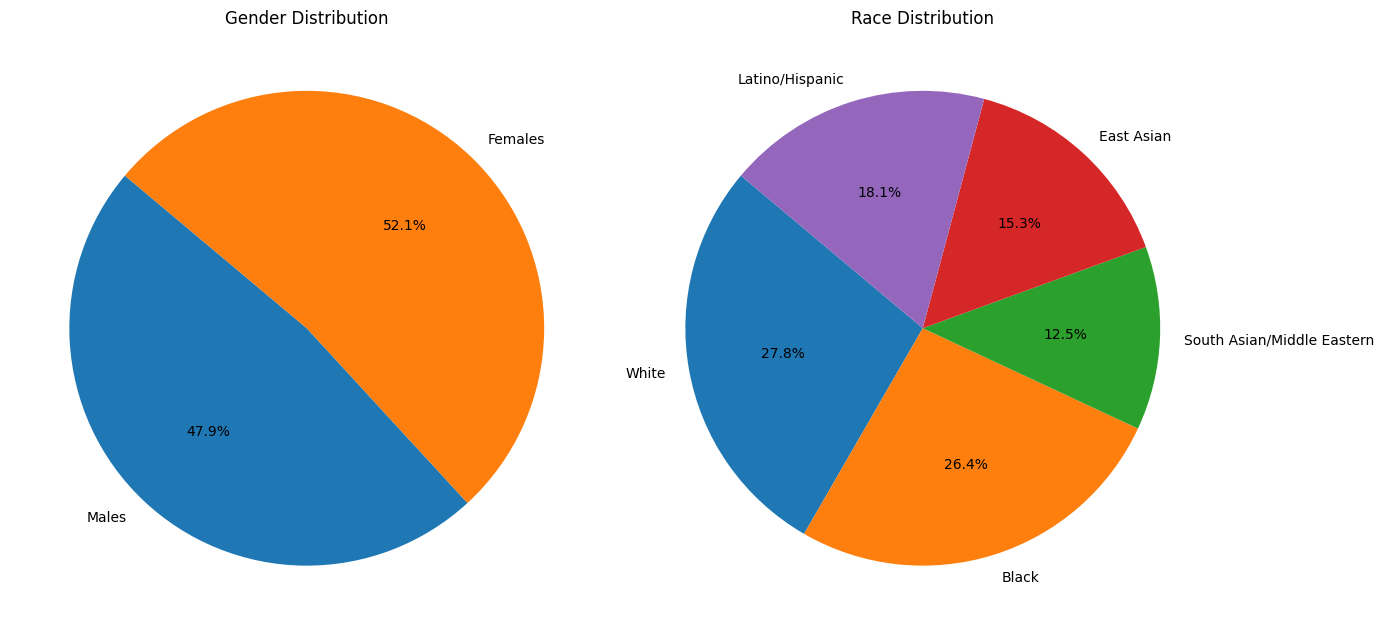

In [11]:
# Data to plot
gender_counts = [males, females]
gender_labels = ['Males', 'Females']
race_counts = [white, black, indian, asian, latinx]
race_labels = ['White', 'Black', 'South Asian/Middle Eastern', 'East Asian', 'Latino/Hispanic']

# Creating the visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Gender Pie Chart
axs[0].pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Gender Distribution')

# Race Pie Chart
axs[1].pie(race_counts, labels=race_labels, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Race Distribution')

plt.tight_layout()
plt.show()

In [ ]:
ground_truth_dict

{'friends1': {'races': ['Black'],
  'genders': ['Male'],
  'races_and_genders': ['Black Male']},
 'friends2': {'races': ['Black'],
  'genders': ['Male'],
  'races_and_genders': ['Black Male']},
 'friends3': {'races': ['Black'],
  'genders': ['Male'],
  'races_and_genders': ['Black Male']},
 'friends4': {'races': ['Black'],
  'genders': ['Male'],
  'races_and_genders': ['Black Male']},
 'friends5': {'races': ['Black'],
  'genders': ['Male'],
  'races_and_genders': ['Black Male']},
 'friends6': {'races': ['Black'],
  'genders': ['Female'],
  'races_and_genders': ['Black Female']},
 'friends7': {'races': ['Black'],
  'genders': ['Male'],
  'races_and_genders': ['Black Male']},
 'friends8': {'races': ['White'],
  'genders': ['Male'],
  'races_and_genders': ['White Male']},
 'friends9': {'races': ['White'],
  'genders': ['Female'],
  'races_and_genders': ['White Female']},
 'friends10': {'races': ['White', 'White', 'White'],
  'genders': ['Female', 'Female', 'Female'],
  'races_and_genders'

In [ ]:
prediction_df

,face_name_align,race,race4,gender
0,detected_faces/friends19_face2.png,White,White,Female
1,detected_faces/mr_mrs_smith1_face1.png,Black,Black,Male
2,detected_faces/friends12_face0.jpeg,Middle Eastern,White,Male
3,detected_faces/friends14_face0.png,Middle Eastern,White,Male
4,detected_faces/mr_mrs_smith1_face0.png,East Asian,Asian,Female
...,...,...,...,...
72,detected_faces/got2_face0.jpeg,Middle Eastern,White,Female
73,detected_faces/friends10_face0.jpeg,White,White,Female
74,detected_faces/friends20_face0.png,Black,Black,Female
75,detected_faces/beef2_face0.png,East Asian,Indian,Male


In [8]:
predictions_dict = {}

for index,row in prediction_df.iterrows():
  # Group Southeast Asian and Asian together as East Asian. Group Middle Eastern and Indian into South Asian/Middle Eastern

  # Parse name
  name = row['face_name_align'].split("/", 1)[1].split("_face", 1)[0]

  # Create set for file name if not already created
  if name not in predictions_dict:
    predictions_dict[name] = {"races":[],
                              "genders": [],
                              "races_and_genders": []}

  # Parse demographic instance
  race = row['race4']
  gender = row['gender']

  if "friends15" in name:
    print(race)
  if race == "Southeast Asian" or race == "Asian":
    race = "East Asian"
  elif race == "Middle Eastern" or race == "Indian":
    race = "South Asian/Middle Eastern"

  # Add to set
  predictions_dict[name]['races'].append(race)
  predictions_dict[name]['genders'].append(gender)

  race_gender_instance = race + " " + gender
  predictions_dict[name]["races_and_genders"].append(race_gender_instance)

  # print(name)
  # print(race_gender_instance)


White
White
White


In [ ]:
predictions_dict

{'friends19': {'races': ['White', 'Black', 'White'],
  'genders': ['Female', 'Male', 'Female'],
  'races_and_genders': ['White Female', 'Black Male', 'White Female']},
 'mr_mrs_smith1': {'races': ['Black', 'East Asian'],
  'genders': ['Male', 'Female'],
  'races_and_genders': ['Black Male', 'East Asian Female']},
 'friends12': {'races': ['White'],
  'genders': ['Male'],
  'races_and_genders': ['White Male']},
 'friends14': {'races': ['White'],
  'genders': ['Male'],
  'races_and_genders': ['White Male']},
 'friends21': {'races': ['Black', 'White'],
  'genders': ['Female', 'Male'],
  'races_and_genders': ['Black Female', 'White Male']},
 'friends13': {'races': ['White'],
  'genders': ['Female'],
  'races_and_genders': ['White Female']},
 'friends8': {'races': ['White', 'White'],
  'genders': ['Male', 'Male'],
  'races_and_genders': ['White Male', 'White Male']},
 'betty1': {'races': ['White'],
  'genders': ['Female'],
  'races_and_genders': ['White Female']},
 'never1': {'races': ['East

In [9]:
# Get accuracy
# Confirm same items: predictions_dict.keys() == ground_truth_dict.keys()
from collections import Counter

total_ground_truth_instances = 0
total_correct_race = 0
total_correct_gender = 0
total_correct_race_and_gender = 0

count = 0

for name in ground_truth_dict.keys():
  print("\nName: " + name)
  # Get ground truth instances
  ground_truth_instances = ground_truth_dict[name]
  ground_truth_race_instances = ground_truth_dict[name]['races']
  ground_truth_gender_instances = ground_truth_dict[name]['genders']
  ground_truth_race_and_gender_instances= ground_truth_dict[name]['races_and_genders']
  print("True")
  print(ground_truth_race_and_gender_instances)

  # Add to total instances of ground truth per image
  total_ground_truth_instances += len(ground_truth_instances['races'])

  # Get predicted instances
  predicted_race_instances = predictions_dict[name]['races']
  predicted_gender_instances = predictions_dict[name]['genders']
  predicted_race_and_gender_instances= predictions_dict[name]['races_and_genders']
  print("Prediction")
  print(predicted_race_and_gender_instances)


  # Use Counter to count occurrences for each instance type
  counter_race_ground_truth = Counter(ground_truth_race_instances)
  counter_race_predictions = Counter(predicted_race_instances)
  counter_gender_ground_truth = Counter(ground_truth_gender_instances)
  counter_gender_predictions = Counter(predicted_gender_instances)
  counter_race_and_gender_ground_truth = Counter(ground_truth_race_and_gender_instances)
  counter_race_and_gender_predictions = Counter(predicted_race_and_gender_instances)

  # Find intersection considering duplicates
  race_intersection = counter_race_ground_truth & counter_race_predictions
  gender_intersection = counter_gender_ground_truth & counter_gender_predictions
  race_and_gender_intersection = counter_race_and_gender_ground_truth & counter_race_and_gender_predictions

  # Convert the intersection Counter back to a list
  race_intersection_list = list(race_intersection.elements())
  gender_intersection_list = list(gender_intersection.elements())
  race_and_gender_intersection_list = list(race_and_gender_intersection.elements())

  # Add totals
  total_correct_race += len(race_intersection_list)
  total_correct_gender += len(gender_intersection_list)
  total_correct_race_and_gender += len(race_and_gender_intersection_list)
  print(len(race_and_gender_intersection_list))



Name: friends1
True
['Black Male']
Prediction
['Black Male']
1

Name: friends2
True
['Black Male']
Prediction
['Black Male']
1

Name: friends3
True
['Black Male']
Prediction
['Black Male']
1

Name: friends4
True
['Black Male']
Prediction
['Black Male']
1

Name: friends5
True
['Black Male']
Prediction
['Black Male']
1

Name: friends6
True
['Black Female']
Prediction
['Black Female']
1

Name: friends7
True
['Black Male']
Prediction
['Black Male']
1

Name: friends8
True
['White Male']
Prediction
['White Male', 'White Male']
1

Name: friends9
True
['White Female']
Prediction
['White Female']
1

Name: friends10
True
['White Female', 'White Female', 'White Female']
Prediction
['White Female', 'White Female', 'White Female']
3

Name: friends11
True
['White Female', 'White Female']
Prediction
['White Female', 'White Female']
2

Name: friends12
True
['White Male']
Prediction
['White Male']
1

Name: friends13
True
['White Female']
Prediction
['White Female']
1

Name: friends14
True
['White Male

In [ ]:
total_correct_race / total_ground_truth_instances

0.8813559322033898

In [ ]:
total_correct_gender / total_ground_truth_instances

1.0

In [ ]:
total_correct_race_and_gender / total_ground_truth_instances

0.8813559322033898

In [ ]:
0.7123287671232876

0.7123287671232876

In [ ]:
total_ground_truth_instances

59